# data info

OPS: OPS는 On base Plus Slugging 의 약자이며 말 그대로 출루율과 장타율의 합이다.

①    Regular_Season_Batter.csv : KBO에서 활약한 타자들의 역대 정규시즌 성적을 포함하여 몸무게, 키 ,생년월일 등의 기본정보  
②    Regular_Season_Batter_Day_by_Day.csv: KBO에서 활약한 타자들의 일자 별 정규시즌 성적  
③    Pre_Season_Batter.csv : KBO에서 활약한 타자들의 역대 시범경기(정규시즌 직전에 여는 연습경기) 성적  
④    submission.csv : 참가자들이 예측해야 할 타자의 이름과 아이디 목록

batter_id: 타자의 고유 아이디  
batter_name : 타자 이름  
year: 년도    
team: 소속팀    
avg: 타율  
G: 출전게임수  
AB: 타수(타석-볼넷-사구-희생번트-희생플라이)  
R: 득점  
H: 안타(1루타+2루타+3루타+홈런)  
2B: 2루타  
3B: 3루타  
HR: 홈런  
TB: 루타수   
RBI: 타점  
SB: 도루성공  
CS: 도루실패  
BB: 볼넷  
HBP: 사수  
SO: 삼진아웃  
GDP: 병살타  
SLG: 장타율  
OBP: 출루율  
E: 에러  
height/weight: 선수의 키/몸무게  
year_born: 선수의 생년월일  
position: 선수의 수비위치  
career: 선수의 커리어  
starting_salary: 선수의 한국프로야구 입단연봉  
OPS: (OBP + SLG)  

# data load

In [2]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False


In [6]:
import os 
listdir = os.listdir('data/')
print(listdir)

['Pre_Season_Batter.csv', 'Regular_Season_Batter.csv', 'Regular_Season_Batter_Day_by_Day_b4.csv', 'submission.csv']


In [14]:
pd.set_option('display.max_columns', None)

preseason_df = pd.read_csv('data/' + listdir[0])
regular_df = pd.read_csv('data/' + listdir[1])
regular_day = pd.read_csv('data/' + listdir[2])
sub = pd.read_csv('data/' + listdir[3])
display((preseason_df.head(1)), regular_df.head(1), regular_day.head(3), sub.head(1))

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.55,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902


,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018


,batter_id,batter_name
0,1,강경학


# EDA

## 프리시즌 데이터 분석

In [4]:
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


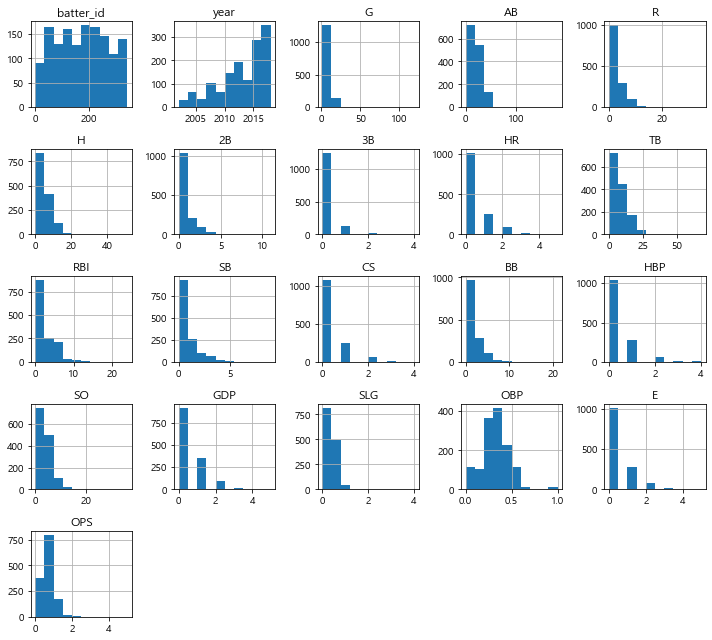

In [5]:
preseason_df.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

In [6]:
regular_count = regular_df.groupby('year')['batter_id'].count().rename('regular')
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count, 2).rename('ratio')], axis=1).transpose().loc[:, 2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


정규시즌과 프리시즌과의 상관관계 확인

In [7]:
regular_df['new_idx'] = regular_df['batter_name'] + regular_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

In [8]:
intersection_idx = list(set(regular_df['new_idx']).intersection(preseason_df['new_idx']))

In [9]:
regular_new = regular_df.loc[regular_df['new_idx'].apply(lambda x:x in intersection_idx)].copy()
regular_new = regular_new.sort_values(by='new_idx').reset_index(drop=True)

In [10]:
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x : x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop=True)

In [11]:
print(regular_new.shape, preseason_new.shape)
print(sum(regular_new['new_idx']==preseason_new['new_idx']))

(1358, 30) (1358, 30)
1358


In [12]:
import warnings
warnings.filterwarnings(action='ignore')

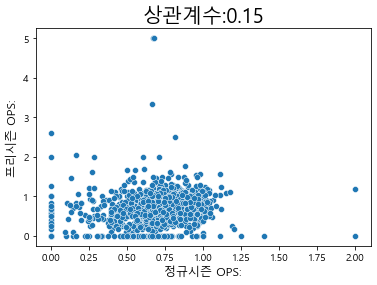

In [13]:
corr = regular_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_new['OPS'], preseason_new['OPS'])
plt.title('상관계수:' + str(np.round(corr, 2)), fontsize=20)
plt.xlabel('정규시즌 OPS:', fontsize=12)
plt.ylabel('프리시즌 OPS:', fontsize=12)
plt.show()

두 가지 결과를 얻었다. 프리시즌 데이터가 적다. 상관관계가 낮다. 따라서 제외한다.

## 정규시즌 데이터 분석

In [14]:
regular_df = pd.read_csv('data/' + listdir[1])
display(regular_df.shape, regular_df.head(), regular_df.describe())

(2454, 29)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


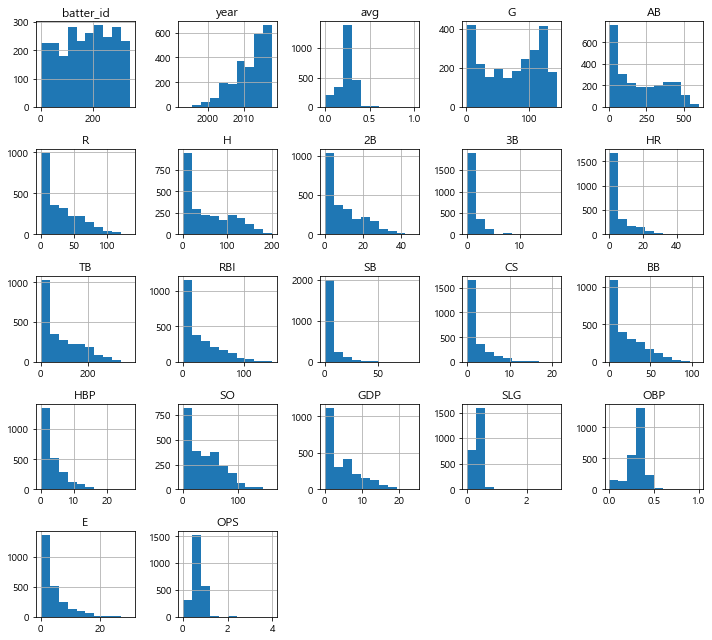

In [15]:
regular_df.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

### 연도별 OPS 살펴보기

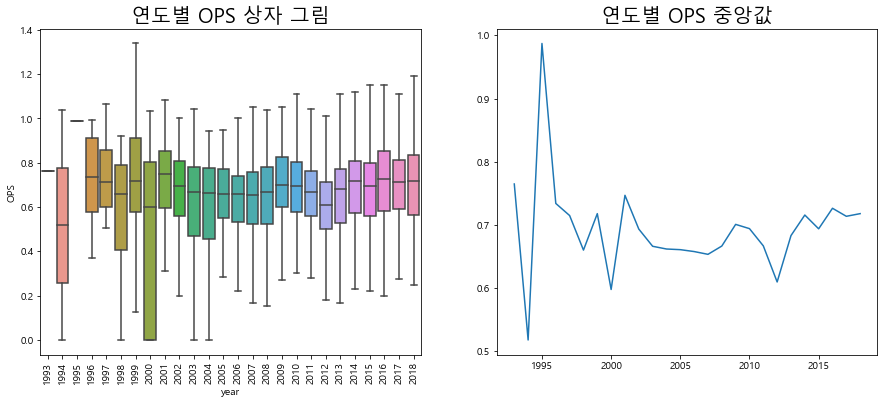

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
g = sns.boxplot(data=regular_df, x='year', y='OPS', ax=axes[0], showfliers=False) #showfliers, 이상치 안그림
axes[0].set_title('연도별 OPS 상자 그림', size=20)
axes[0].set_xticklabels(g.get_xticklabels(), rotation=90)

axes[1].plot(regular_df.groupby('year')['OPS'].median())
axes[1].set_title('연도별 OPS 중앙값', size=20)

plt.show()

In [17]:
pd.crosstab(regular_df['year'], 'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


### 팀별 OPS 살펴보기

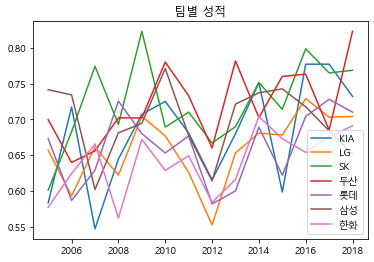

In [18]:
med_OPS_team = regular_df.pivot_table(index=['team'], columns='year', values='OPS', aggfunc='median')

team_idx = med_OPS_team.loc[:, 2005:].isna().sum(axis=1) <= 0

plt.plot(med_OPS_team.loc[team_idx, 2005:].T)
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns)
plt.title('팀별 성적')
plt.show()

### 몸무게, 키 -> 장타율, 출루율

In [22]:
regular_df[['height/weight']].head()

,height/weight
0,177cm/93kg
1,180cm/72kg
2,180cm/72kg
3,180cm/72kg
4,180cm/72kg


In [23]:
import re

regular_df['weight'] = regular_df['height/weight'].apply(
    lambda x : int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)

regular_df['height'] = regular_df['height/weight'].apply(
    lambda x : int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_df['height/weight'][0], regular_df['height'][0], regular_df['weight'][0])

177cm/93kg 177.0 93.0


In [24]:
regular_df['weight_per_height'] = regular_df['weight'] / regular_df['height']

In [29]:
regular_df[['height/weight','height','weight', 'weight_per_height']].head()

,height/weight,height,weight,weight_per_height
0,177cm/93kg,177.0,93.0,0.525424
1,180cm/72kg,180.0,72.0,0.400000
2,180cm/72kg,180.0,72.0,0.400000
3,180cm/72kg,180.0,72.0,0.400000
4,180cm/72kg,180.0,72.0,0.400000


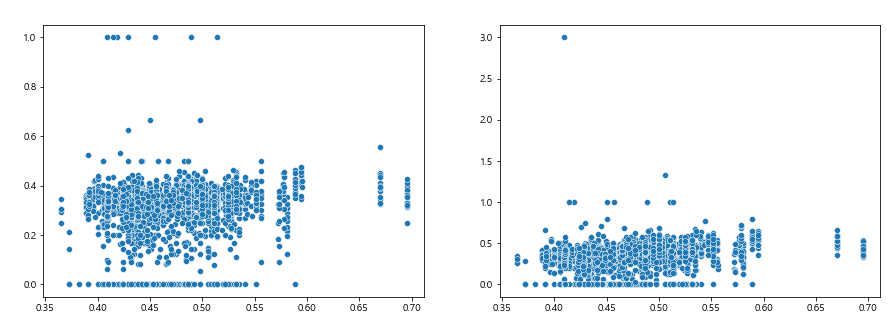

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

corr = regular_df['weight_per_height'].corr(regular_df['OBP'])
sns.scatterplot(data=regular_df, x=regular_df['weight_per_height'], y=regular_df['OBP'], ax=axes[0])

axes[0].set_title("'몸무게/키'와 OBP의 corr:" + str(np.round(corr, 2)), fontdict={'fontsize': 15, 'fontweight': 'medium', 'color':'white'})
axes[0].set_ylabel('정규시즌 OBP', fontsize=12, color='white')
axes[0].set_xlabel('몸무게 / 키', fontsize=12, color='white')

corr = regular_df['weight_per_height'].corr(regular_df['SLG'])
sns.scatterplot(data=regular_df, x=regular_df['weight_per_height'], y=regular_df['SLG'], ax=axes[1])

axes[1].set_title("'몸무게/키'와 SLG의 corr:" + str(np.round(corr, 2)), fontdict={'fontsize': 15, 'fontweight': 'medium', 'color':'white'})
axes[1].set_ylabel('정규시즌 SLG', fontsize=12, color='white')
axes[1].set_xlabel('몸무게 / 키', fontsize=12, color='white')


#axes[0].xaxis.label.set_color('white')
#axes[0].yaxis.label.set_color('white')
#axes[0].tick_params(axis='x', colors='white')
#axes[0].tick_params(axis='y', colors='white')
#axes[0].tick_params(color='white')
#axes[0].spines['bottom'].set_color('white')
#axes[0].spines['top'].set_color('white')




plt.show()

상관계수가 매우 낮고. 데이터가 매우 고르게 분포되어 있음을 알 수 있다.

### position

In [68]:
regular_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [69]:
regular_df['pos'] = regular_df['position'].apply(lambda x: x.split('(')[0] if pd.notnull(x) else x)

regular_df['hit_way'] = regular_df['position'].apply(lambda x: x[-3:-1] if pd.notnull(x) else x)

In [71]:
regular_df[['position', 'pos', 'hit_way']].head(3)

,position,pos,hit_way
0,내야수(우투우타),내야수,우타
1,내야수(우투좌타),내야수,좌타
2,내야수(우투좌타),내야수,좌타


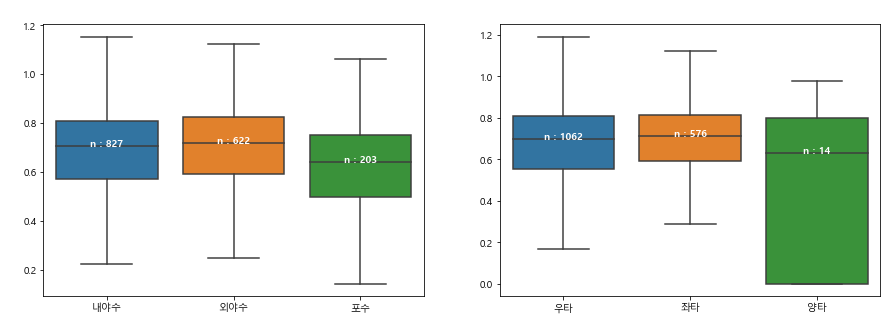

In [95]:
_ , axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=regular_df, x='pos', y='OPS', showfliers=False, ax=axes[0])

medians = regular_df.groupby('pos')['OPS'].median().to_dict()
nobs = regular_df['pos'].value_counts().to_dict()
for key in nobs: 
    nobs[key] = "n : " + str(nobs[key])

i = 0
for key in nobs:
    axes[0].text(i, medians[key], nobs[key], horizontalalignment='center', color='w', weight='semibold')
    i += 1

axes[0].set_title('포지션 별 OPS', color='w', fontsize=15)
axes[0].set_xlabel('포지션', color='w', fontsize=12)
axes[0].set_ylabel('OPS', color='w', fontsize=12)

sns.boxplot(data=regular_df, x='hit_way', y='OPS', showfliers=False, ax=axes[1])

medians = regular_df.groupby('hit_way')['OPS'].median().to_dict()
nobs = regular_df['hit_way'].value_counts().to_dict()
for key in nobs: 
    nobs[key] = "n : " + str(nobs[key])

i = 0
for key in nobs:
    axes[1].text(i, medians[key], nobs[key], horizontalalignment='center', color='w', weight='semibold')
    i += 1

axes[1].set_title('포지션 별 OPS', color='w', fontsize=15)
axes[1].set_xlabel('주 손', color='w', fontsize=12)
axes[1].set_ylabel('OPS', color='w', fontsize=12)

plt.show()

### 내국인, 외국인 구분

In [99]:
regular_df['career'].head(5)

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [113]:
foreign_country = regular_df['career'].apply(lambda x : x.replace('-', ' ').split(' ')[0])

foreign_country_list = list(set(foreign_country.apply(lambda x : np.nan if '초' in x else x)))
foreign_country_list = [x for x in foreing_country_list if str(x) != 'nan']
foreign_country_list

['도미니카', '미국', '네덜란드', '쿠바', '캐나다']

In [117]:
regular_df['country'] = foreign_country
regular_df['country'] = regular_df['country'].apply(lambda x: x if pd.isnull(x) 
                                                    else ('foreign' if x in foreign_country_list else 'korean'))
regular_df[['country']].head(3)

,country
0,foreign
1,korean
2,korean


In [135]:
ax.get_xticklabels()

[Text(0, 0, 'foreign'), Text(1, 0, 'korean')]

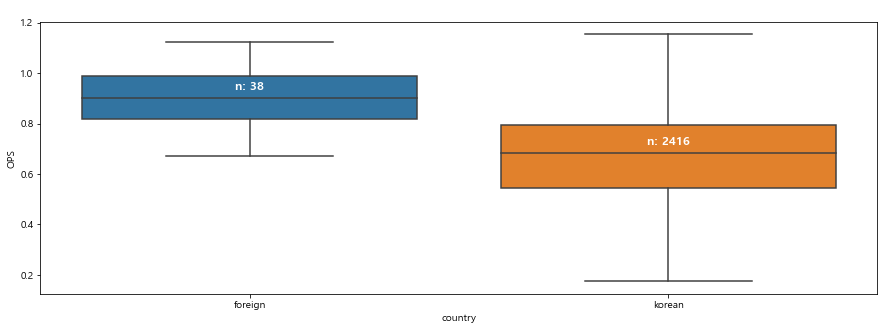

In [145]:
plt.figure(figsize= (15, 5))
ax = sns.boxplot(x='country', y='OPS', data=regular_df, showfliers=False)

medians = regular_df.groupby('country')['OPS'].median().to_dict()
nobs = regular_df['country'].value_counts().to_dict()

for key in nobs: nobs[key] = 'n: ' + str(nobs[key])

xticks_labels = [item.get_text() for item in ax.get_xticklabels()]
    
for label in ax.get_xticklabels():
    label = label.get_text()
    ax.text(xticks_labels.index(label), medians[label] + 0.03, nobs[label], color='w', 
            size='large', weight='semibold', horizontalalignment='center')

ax.set_title('국적별 OPS', color='w')
plt.show()